In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %matplotlib widget

# Load the data from the provided text file
# file_path = './Rectangle-1/2-8760(Best).txt' # Rect
# file_path = './Oct/2-8760(Best).txt' # Oct
# file_path = './LargeCircle-0(Broken)/4(7400AndBestSoFar)/TipPositionCoordinates.csv' # Circle
file_path = 'SimulationResults.csv' # Circle

# Read the file, assuming it has two columns representing x and y coordinates
data_corrected = pd.read_csv(file_path, header=None, names=['x', 'y'])

In [3]:
data_corrected

,x,y
0,0.102178,-0.088912
1,0.102479,-0.088996
2,0.102686,-0.089044
3,0.108347,-0.090722
4,0.102508,-0.089041
...,...,...
16617,0.096771,-0.087849
16618,0.096609,-0.087679
16619,0.096579,-0.087560
16620,0.092321,-0.085680


In [4]:
x_l = len(data_corrected['x'])

In [5]:
# # Step 2: Identify the max x-value
# max_x = data_corrected['x'][x_l-1]

# # Step 3: Create new x-values incrementally starting from max_x
# num_new_values = 600  # Number of new values to append
# increment_x = 0.0001  # Increment for x-values

# noise = np.random.normal(0, 0.0002, num_new_values)  # Mean 0, std deviation 0.1 (adjust as needed)

# new_x_values = [max_x + increment_x * i + noise[i] for i in range(num_new_values)]

# # Step 4: Generate new y-values with both incremental change and noise
# y_base_value = data_corrected['y'].iloc[-1]  # Use the last y-value as a base
# increment_y = 0.000001  # Increment for y-values

# # Increment the y-values and add noise
# new_y_values = [y_base_value + increment_y * i + noise[i] for i in range(num_new_values)]

# # Step 5: Create a new DataFrame with the new x and updated y-values
# new_data = pd.DataFrame({'x': new_x_values, 'y': new_y_values})

# # Step 6: Append the new DataFrame to the original
# data_corrected = pd.concat([data_corrected, new_data], ignore_index=True)

# data_corrected

In [6]:
%matplotlib widget

from matplotlib.legend_handler import HandlerTuple

# Load the .png image (ground truth background)
# Replace with the path to your .png file
# ground_truth_image = plt.imread('Rect.png')  # Rect GT
# ground_truth_image = plt.imread('Oct.png')  # Oct GT
# ground_truth_image = plt.imread('Circle.png')  # Cir GT
ground_truth_image = plt.imread('SimGT.png')  # Cir GT

# Get the extent of the plot (you can adjust this to fit your specific data)
min_x, max_x = min(data_corrected['x']), max(data_corrected['x'])
min_y, max_y = min(data_corrected['y']), max(data_corrected['y'])

# Add larger padding for the extent of the image
padding_x = (max_x - min_x) * 0.2  # 20% padding for left and right
padding_y = (max_y - min_y) * 0.2  # 20% padding for top and bottom


# Add additional padding to axis limits to make sure nothing sticks to the bounds
x_padding_limit = padding_x * 0.2  # Additional padding to the axis limits
y_padding_limit = padding_y * 0.2

x_lim = [min_x - x_padding_limit, max_x + x_padding_limit]
y_lim = [min_y - y_padding_limit, max_y + y_padding_limit]

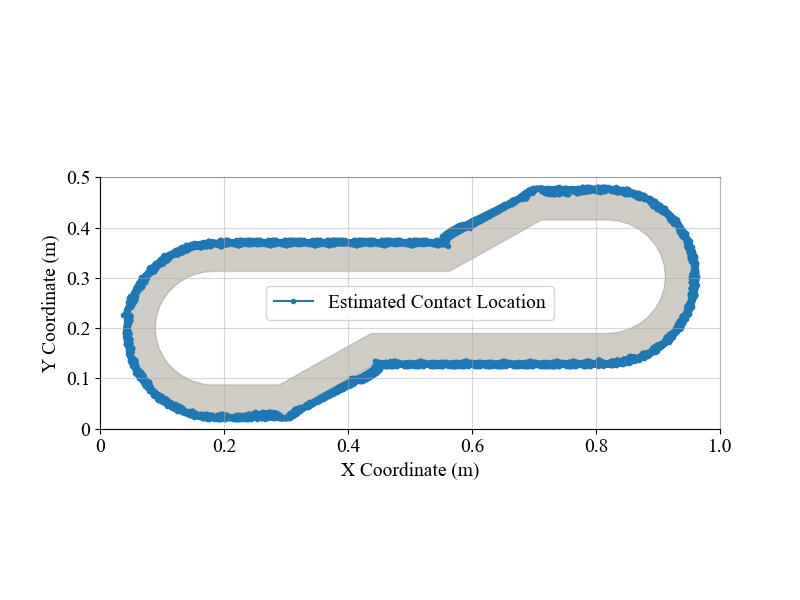

In [7]:
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the reduced dataset to visualize the contour
plt.figure(figsize=(8, 6))

# Add the image as the background with increased padding
# 'extent' sets the position of the image: [left, right, bottom, top]
plt.imshow(ground_truth_image, extent=[min_x, max_x, min_y-0.015, max_y+0.015], aspect='auto', alpha=0.5)
# plt.imshow(ground_truth_image, extent=[min_x, max_x, min_y, max_y], aspect='auto', alpha=0.5)

# Highlight the start and end points with special markers
# start = plt.scatter(data_corrected['x'].iloc[0], data_corrected['y'].iloc[0], 
#                     marker='o', facecolors='black', edgecolors='black', s=100, zorder=3)  # Hollow circle for start point
# end = plt.scatter(data_corrected['x'].iloc[-1], data_corrected['y'].iloc[-1], 
#                   marker='X', facecolors='black', edgecolors='black', s=100, zorder=3)  # Filled 'X' for end point

# Plot the reduced contour
line, = plt.plot(data_corrected['x'], data_corrected['y'], marker='.', linestyle='-', color='#1f77b4', zorder=1, label="Extracted Contour")

# x_lim = (0.4430, 0.4569)
# y_lim = (-0.039, -0.0292)

plt.xlim(x_lim)
plt.ylim(y_lim)

# Set custom tick locations to reduce density
x_ticks = np.linspace(x_lim[0], x_lim[1], 6)  # 5 evenly spaced ticks on x-axis
y_ticks = np.linspace(y_lim[0], y_lim[1], 6)  # 5 evenly spaced ticks on y-axis
plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Custom labels (replace these with your desired labels)
# x_labels = ['0', '3', '6', '9', '12', '15', '18']
# y_labels = ['0', '3', '6', '9', '12', '15', '18']

y_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5']
x_labels = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']

# Set the custom tick locations and labels
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.yticks(y_ticks, y_labels, fontsize=14)

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Add grid
plt.grid(True, alpha=0.5)

# Reduce transparency of upper and right bound spines
ax = plt.gca()  # Get current axis
ax.spines['top'].set_alpha(0.3)  # Set the transparency of the top spine (0.3 for reduced opacity)
ax.spines['right'].set_alpha(0.3)  # Set the transparency of the right spine (0.3 for reduced opacity)

# Add labels and title
plt.xlabel('X Coordinate (m)', fontsize=14)  # Replace with appropriate x-axis label
plt.ylabel('Y Coordinate (m)', fontsize=14)  # Replace with appropriate y-axis label
# plt.title('Contour Plot with Ground Truth Background')   # Replace with relevant title

# Add legend
plt.legend([line], 
           ['Estimated Contact Location'], 
           handler_map={tuple: HandlerTuple(ndivide=None, pad=0.6)},  
           loc='center', bbox_to_anchor=(0.5, 0.5), frameon=True, fontsize=14)

# Show plot
plt.show()


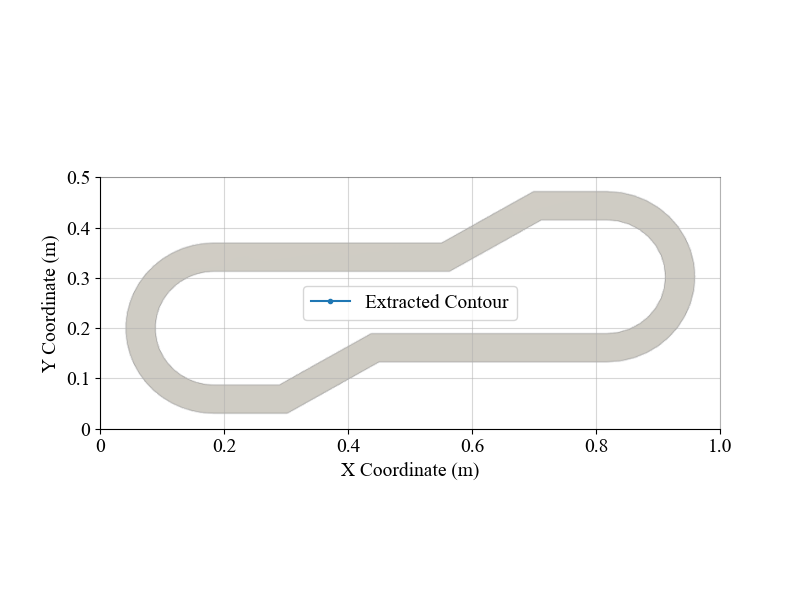

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ensure your dataset `data_corrected` is ready, and contains 'x' and 'y' columns

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Display the background image
img = ax.imshow(ground_truth_image, extent=[min_x, max_x, min_y-0.015, max_y+0.015], aspect='auto', alpha=0.5)
# img = ax.imshow(ground_truth_image, extent=[min_x, max_x, min_y, max_y], aspect='auto', alpha=0.5)

# Plot an initial empty line
line, = ax.plot([], [], marker='.', linestyle='-', color='#1f77b4', zorder=1, label="Extracted Contour")

# Setup the axis limits, aspect ratio, and ticks
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
x_ticks = np.linspace(x_lim[0], x_lim[1], 6)
y_ticks = np.linspace(y_lim[0], y_lim[1], 6)
y_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5']
x_labels = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=14)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, alpha=0.5)

# Optional: Set transparency for spines
ax.spines['top'].set_alpha(0.3)
ax.spines['right'].set_alpha(0.3)

# Optional: Add labels and legend
ax.set_xlabel('X Coordinate (m)', fontsize=14)
ax.set_ylabel('Y Coordinate (m)', fontsize=14)
legend = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5), fontsize=14)

# Define the update function
def update(frame):
    # Update the line data for each frame
    line.set_data(data_corrected['x'][:frame], data_corrected['y'][:frame])
    return line,

# Number of frames is based on the length of data
num_frames = len(data_corrected)

# Create the animation with a specified interval (speed) between frames
anim = FuncAnimation(fig, update, frames=num_frames, interval=15, blit=True)  # interval is in milliseconds

# Save the animation as a video file (optional)
# anim.save('contour_animation.gif', writer='pillow', fps=40)  # 40 fps for faster playback

# Or display the animation in a window
plt.show()
